<a href="https://colab.research.google.com/github/VishalM23/Deep-Learning/blob/master/Credit_Card_Fraud_Detection_Using_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

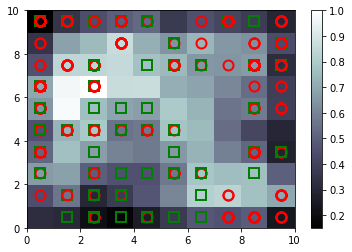

In [3]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [0]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,6)], mappings[(2,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [5]:
frauds

array([[1.5608595e+07, 0.0000000e+00, 3.0420000e+01, 1.3750000e+00,
        2.0000000e+00, 9.0000000e+00, 8.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.4000000e+01],
       [1.5761158e+07, 0.0000000e+00, 1.6500000e+01, 1.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 9.9000000e+01],
       [1.5711742e+07, 0.0000000e+00, 2.3000000e+01, 1.8350000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 5.4000000e+01],
       [1.5761733e+07, 0.0000000e+00, 1.6080000e+01, 3.3500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,